# Тема “Обучение без учителя”

### Задание 1

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mp

In [58]:
from sklearn.datasets import load_boston
boston = load_boston()

In [59]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [60]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [61]:
x = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['prise'])

In [62]:
#Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
#с помощью функции train_test_split так, чтобы размер тестовой выборки
#составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [63]:
#Масштабируйте данные с помощью StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)

In [68]:
#Постройте модель TSNE на тренировочный данных с параметрами:
#n_components=2, learning_rate=250, random_state=42.
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

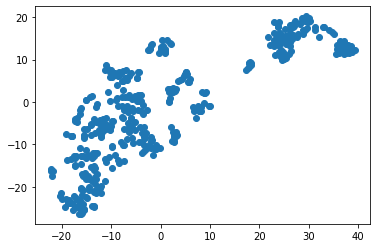

In [69]:
#Постройте диаграмму рассеяния на этих данных
mp.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

### Задание 2

In [86]:
#С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train
#Параметр max_iter должен быть равен 100, random_state сделайте равным 42
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(x_train_scaled)

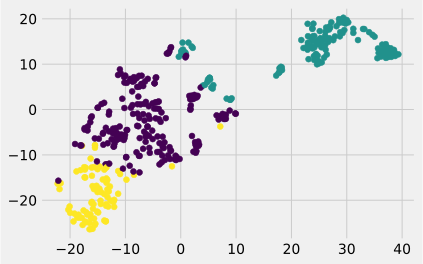

In [107]:
#Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
#и раскрасьте точки из разных кластеров разными цветами
mp.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
mp.show()

In [108]:
#Вычислите средние значения price и CRIM в разных кластерах.
print('Средние значения price:')
print('Кластер 0: {}'.format(y_train[labels_train == 0].mean()))
print('Кластер 1: {}'.format(y_train[labels_train == 1].mean()))
print('Кластер 2: {}'.format(y_train[labels_train == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(x_train.loc[labels_train == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(x_train.loc[labels_train == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(x_train.loc[labels_train == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: prise    24.958115
dtype: float64
Кластер 1: prise    16.165354
dtype: float64
Кластер 2: prise    27.788372
dtype: float64
Средние значения CRIM:
Кластер 0: 0.42166020942408367
Кластер 1: 10.797028425196853
Кластер 2: 0.07356558139534886


In [109]:
#3.Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
labels_test = kmeans.predict(x_test_scaled)

In [110]:
#Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.
print('Средние значения price:')
print('Кластер 0: {}'.format(y_test[labels_test == 0].mean()))
print('Кластер 1: {}'.format(y_test[labels_test == 1].mean()))
print('Кластер 2: {}'.format(y_test[labels_test == 2].mean()))
print('Средние значения CRIM:')
print('Кластер 0: {}'.format(x_test.loc[labels_test == 0, 'CRIM'].mean()))
print('Кластер 1: {}'.format(x_test.loc[labels_test == 1, 'CRIM'].mean()))
print('Кластер 2: {}'.format(x_test.loc[labels_test == 2, 'CRIM'].mean()))

Средние значения price:
Кластер 0: prise    21.860784
dtype: float64
Кластер 1: prise    16.437143
dtype: float64
Кластер 2: prise    31.35
dtype: float64
Средние значения CRIM:
Кластер 0: 0.26607882352941176
Кластер 1: 10.165531142857143
Кластер 2: 0.062060000000000004
